In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from kuramoto import *


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/envs/dde/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Define functions for reading in the csv files and organising the data

In [2]:
def process_file(filename): 
    # first, read in the csv files
    dataframe = pd.read_csv(filename)
    
    # extract the columns we want and concatenate them together 
    sub_dataframe = concat_columns(dataframe)
    
    # make list of datasets from the sub_dataframe 
    datasets = make_datasets(sub_dataframe) 
    
    # filter out the segments that are too short 
    f = lambda x: len(x['length']) > 2 
    datasets = list(filter(f, datasets))
    
    return datasets 
    
def concat_columns(dataframe):
    temp = {} 
    for col in dataframe.columns: 
        full_name = col.split('.')
        if len(full_name) == 1: 
            temp[col] = dataframe[col]
        if len(full_name) == 2:
            temp[full_name[0]] = pd.concat([temp[full_name[0]], dataframe[col]], ignore_index=True)
    sub_dict = {k: temp[k] for k in ['Branch', 'Length', 'Phase']}
    sub_dataframe = pd.DataFrame(sub_dict)
    return sub_dataframe 
    
def make_datasets(sub_dataframe): 
    datasets = [] 
    flag = True
    for (i, row) in sub_dataframe.iterrows():
        if row.isnull().all():
            flag = True
        else: 
            if flag: # start a new dataset 
                dataset = {} 
                datasets.append(dataset)
                dataset['ends'] = []
                dataset['length'] = [] 
                dataset['phase'] = [] 
                flag = False 
            try: 
                dataset['length'].append(int(row['Length'].replace(',', '')))
                dataset['phase'].append(int(row['Phase'][-1]))
            except Exception: 
                print(row)
            if isinstance(row['Branch'], str): 
                dataset['ends'].append(row['Branch'].lower())
                
    return datasets 

## First we try to process all datasets and look at the distribution of the three phases 

In [3]:
datasets = [] 
for i in range(1, 10): 
    datasets += process_file('data/T{}.csv'.format(i))

In [4]:
lengths = [[], [], []]
for dataset in datasets: 
    p = dataset['phase']
    l = dataset['length']
    for (i, j) in enumerate([2, 6, 8]): 
        lengths[i].extend([x for (x, y) in zip(l, p) if y == j])

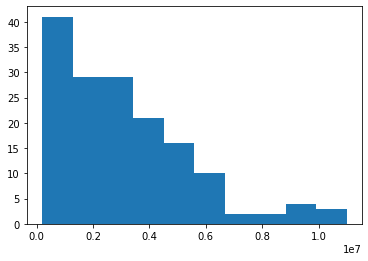

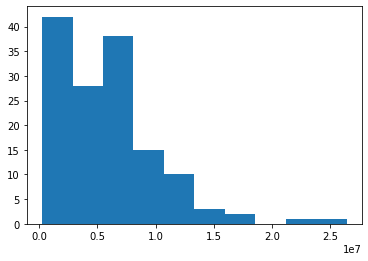

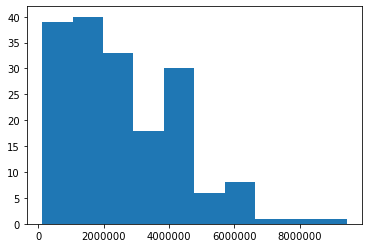

In [6]:
for i in range(3): 
    plt.hist(lengths[i])
    plt.show() 